#figure out pca

In [2]:
import pandas as pd
import numpy as np
import random as rd
from sklearn.decomposition import PCA
from sklearn import preprocessing
from sklearn import manifold
import matplotlib.pyplot as plt
import seaborn as sb
%matplotlib inline

In [3]:
genes = ['gene' + str(i) for i in range(1,101)]
wt = ['wt' + str(i) for i in range(1,6)]
ko = ['ko' + str(i) for i in range(1,6)]

In [4]:
data = pd.DataFrame(columns=[*wt,*ko], index=genes)

In [5]:
for gene in data.index:
    data.loc[gene,'wt1':'wt5'] = np.random.poisson(lam=rd.randrange(10,1000), size=5)
    data.loc[gene,'ko1':'ko5'] = np.random.poisson(lam=rd.randrange(10,1000), size=5)

In [6]:
data.head()

,wt1,wt2,wt3,wt4,wt5,ko1,ko2,ko3,ko4,ko5
gene1,902,887,943,912,865,99,105,108,97,109
gene2,623,627,647,636,607,269,316,299,298,279
gene3,730,715,674,695,661,432,420,435,472,428
gene4,469,439,434,434,436,64,76,76,62,62
gene5,792,782,805,811,777,741,700,747,728,735


In [7]:
scaled_data = preprocessing.scale(data.T)
pca = PCA()
pca.fit(scaled_data)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [8]:
pca_data = pca.transform(scaled_data)

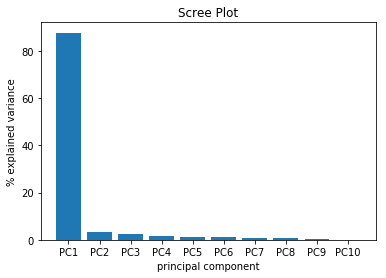

In [9]:
per_var = np.round(pca.explained_variance_ratio_* 100, decimals=1)
labels = ['PC' + str(x) for x in range(1, len(per_var)+1)]

plt.bar(x=range(1, len(per_var)+1), height=per_var, tick_label=labels)
plt.ylabel('% explained variance')
plt.xlabel('principal component')
plt.title('Scree Plot')
plt.show()

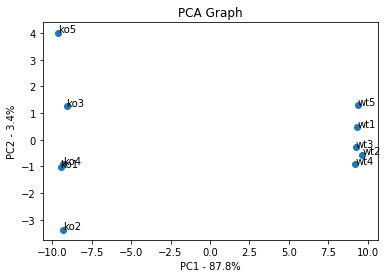

In [10]:
pca_df = pd.DataFrame(pca_data, index=[*wt, *ko], columns=labels)

plt.scatter(pca_df.PC1, pca_df.PC2)
plt.title('PCA Graph')
plt.xlabel('PC1 - {0}%'.format(per_var[0]))
plt.ylabel('PC2 - {0}%'.format(per_var[1]))

for sample in pca_df.index:
    plt.annotate(sample, (pca_df.PC1.loc[sample], pca_df.PC2.loc[sample]))
    
plt.show()

In [11]:
loading_scores = pd.Series(pca.components_[0], index=genes)
sorted_loading_scores = loading_scores.abs().sort_values(ascending=False)
top_10_genes = sorted_loading_scores[0:10].index.values

In [12]:
print(loading_scores[top_10_genes])

gene8     0.106649
gene79   -0.106645
gene80   -0.106631
gene31   -0.106623
gene46   -0.106612
gene27   -0.106594
gene62   -0.106593
gene16    0.106588
gene95   -0.106567
gene98   -0.106565
dtype: float64


In [13]:
# tsne?? 

In [14]:
tsne = manifold.TSNE()

In [15]:
tsne_data = tsne.fit_transform(scaled_data)

In [16]:
tsne_df = pd.DataFrame(tsne_data, index=[*wt, *ko])

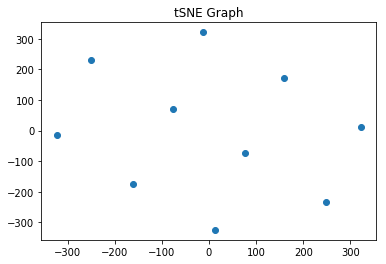

In [17]:
plt.scatter(tsne_df[0], tsne_df[1])
plt.title('tSNE Graph')
#plt.xlabel('PC1 - {0}%'.format(per_var[0]))
#plt.ylabel('PC2 - {0}%'.format(per_var[1]))
    
plt.show()

In [18]:
# maybe try making own data again but w less dimensions? 

In [19]:
genes = ['gene' + str(i) for i in range(1,50)]

In [20]:
tinydata = pd.DataFrame(columns=['cell1','cell2','cell3'], index=genes)

In [21]:
for gene in tinydata.index:
    tinydata.loc[gene,'cell1':'cell3'] = np.random.poisson(lam=rd.randrange(10,1000), size=3)

In [22]:
tinydata.head()

,cell1,cell2,cell3
gene1,869,924,882
gene2,761,767,811
gene3,309,296,322
gene4,620,608,613
gene5,76,60,65


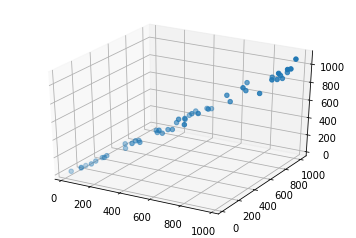

In [23]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

#color_dict = {'wt':'red','ko':'blue'}
#color=[color_dict[i] for i in three.index]
ax.scatter(xs=tinydata.cell1, ys=tinydata.cell2, zs=tinydata.cell3)

In [24]:
scaled_data = preprocessing.scale(tinydata)
pca = PCA()
pca.fit(scaled_data)

pca_data = pca.transform(scaled_data)

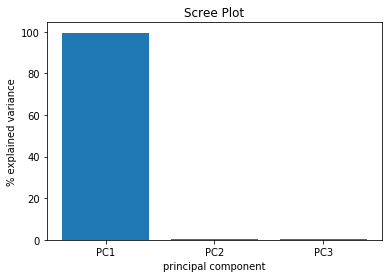

In [25]:
per_var = np.round(pca.explained_variance_ratio_* 100, decimals=1)
labels = ['PC' + str(x) for x in range(1, len(per_var)+1)]

plt.bar(x=range(1, len(per_var)+1), height=per_var, tick_label=labels)
plt.ylabel('% explained variance')
plt.xlabel('principal component')
plt.title('Scree Plot')
plt.show()

In [26]:
pca_df = pd.DataFrame(pca_data, index=genes,columns=labels)
#pca_df['color']=[list(x)[0] for x in pca_df.index]


In [27]:
pca_df.reset_index(inplace=True)

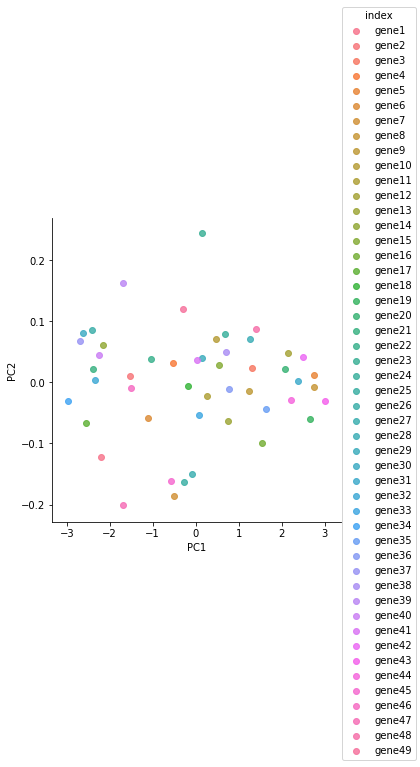

In [28]:
sb.lmplot(x='PC1', y='PC2', data=pca_df, hue='index', fit_reg=False)

In [29]:
tsne = manifold.TSNE()

tsne_data = tsne.fit_transform(scaled_data)
tsne_df = pd.DataFrame(tsne_data, index=genes, columns=['x','y'])
tsne_df.reset_index(inplace=True)
tsne_df.head()

,index,x,y
0,gene1,80.761787,-4.097924
1,gene2,58.124290,-24.234280
2,gene3,-49.677334,5.294658
3,gene4,28.698286,-7.567218
4,gene5,-88.645355,43.645741


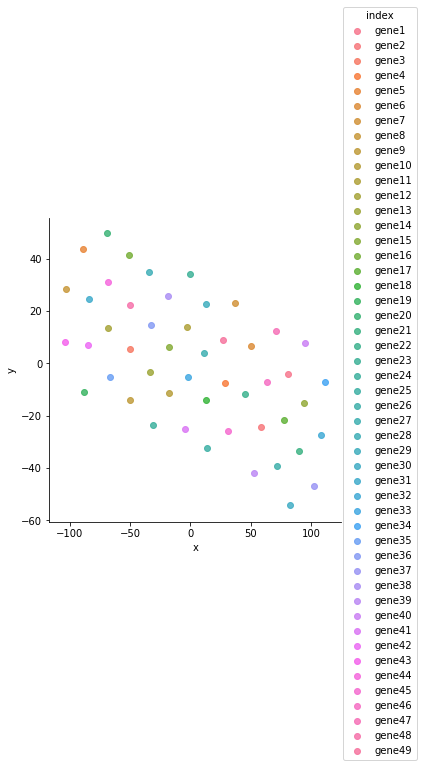

In [30]:
sb.lmplot(x='x', y='y', data=tsne_df, hue='index', fit_reg=False)

In [31]:
#sklearn datasets ?? 

In [32]:
from sklearn import datasets

In [33]:
#generate some data
n_samples = 1500
data = datasets.make_blobs(n_samples=n_samples, n_features=3, centers=3, cluster_std=(.2, 1, 2))
transformation = [[0.2, -0.2, 0.1], [-0.9, 0.8, 0.8], [1, 1, -1]]

In [34]:
X, y = data
X_aniso = np.dot(X, transformation)

In [35]:
X_aniso

array([[-13.21685997,   3.08191263,  12.42084507],
       [ -7.08197602,  -5.18913688,   8.47069883],
       [-12.04288112,  -0.80760516,  13.55482734],
       ..., 
       [-10.81138884,  -3.61038517,  12.62482715],
       [ -6.37148766,  -5.48139754,   7.78685855],
       [ -6.61586216,  -0.29145385,   8.12782507]])

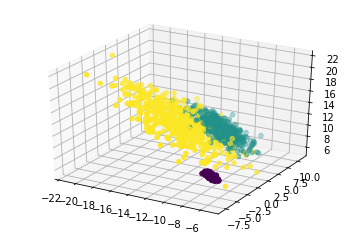

In [36]:
#%matplotlib notebook
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

#color_dict = {'wt':'red','ko':'blue'}
#color=[color_dict[i] for i in three.index]
ax.scatter(xs=X_aniso[:, 0], ys=X_aniso[:,1], zs=X_aniso[:,2], c=y)

In [37]:
scaled_data = preprocessing.scale(X)

In [57]:
pca = PCA()

In [58]:
pca.fit(scaled_data)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [59]:
pca_data = pca.transform(scaled_data)

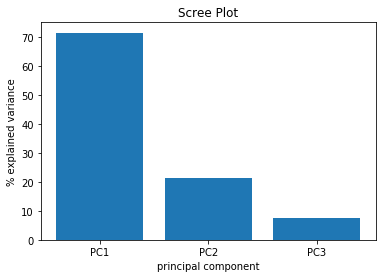

In [41]:
per_var = np.round(pca.explained_variance_ratio_* 100, decimals=1)
labels = ['PC' + str(x) for x in range(1, len(per_var)+1)]

plt.bar(x=range(1, len(per_var)+1), height=per_var, tick_label=labels)
plt.ylabel('% explained variance')
plt.xlabel('principal component')
plt.title('Scree Plot')
plt.show()

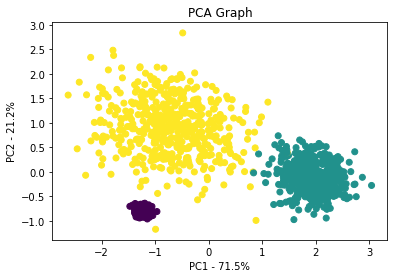

In [69]:
pca_df = pd.DataFrame(pca_data, columns=labels)

plt.scatter(pca_df.PC1, pca_df.PC2, c=y)
plt.title('PCA Graph')
plt.xlabel('PC1 - {0}%'.format(per_var[0]))
plt.ylabel('PC2 - {0}%'.format(per_var[1]))
    
plt.show()

### t-SNE

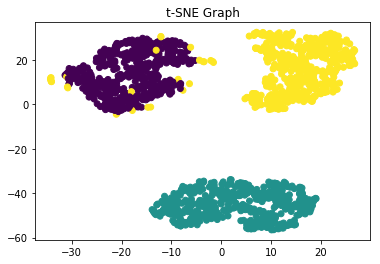

In [174]:
tsne = manifold.TSNE(perplexity=50)

tsne_data = tsne.fit_transform(scaled_data)
tsne_df = pd.DataFrame(tsne_data, columns=['x','y'])

plt.scatter(tsne_df.x, tsne_df.y, c=y)
plt.title('t-SNE Graph')
    
plt.show()

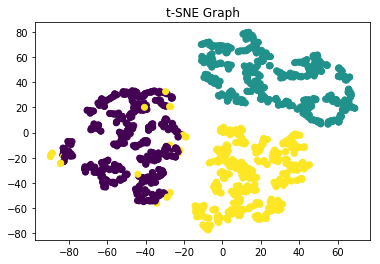

In [175]:
tsne = manifold.TSNE(perplexity=10)

tsne_data = tsne.fit_transform(scaled_data)
tsne_df = pd.DataFrame(tsne_data, columns=['x','y'])

plt.scatter(tsne_df.x, tsne_df.y, c=y)
plt.title('t-SNE Graph')
    
plt.show()